<a href="https://colab.research.google.com/github/biagmes/MVP---Bianca-Gomes/blob/main/MVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# URL de importação do dataset
url = "https://raw.githubusercontent.com/biagmes/MVP---Bianca-Gomes/2107b336596ead82faf4467785df212b6ecd5549/E-commerce%20%20cosmetic%20dataset%20-%20MVP.csv"

# Cabeçalho das colunas
colunas = ['Produto', 'Website', 'País', 'Categoria', 'Subcategoria','Preço', 'Marca', 'Fórmula', 'Tipo', 'Cor', 'Tamanho']

# Lê o arquivo utilizando as colunas informadas
dataset = pd.read_csv(url, names=colunas, header=None, delimiter=';', encoding='latin1')

Este trabalho tem como objetivo analisar o volume de compras de cosméticos da loja Ulta, um dos maiores E-commerces de produtos de beleza nos Estados Unidos. A análise é baseada em um dataset que contém informações detalhadas sobre as compras realizadas, organizadas por categorias de produtos. Embora o estudo não busque resolver um problema específico, ele foca em identificar tendências e padrões no comportamento de compra dos consumidores no segmento de cosméticos. Para isso, técnicas de aprendizado não supervisionado são aplicadas, permitindo a descoberta de agrupamentos e padrões ocultos nos dados.
Em resumo, a análise das categorias dos cosméticos vendidos pode oferecer insights detalhados sobre o desempenho de produtos, estratégias de marca e comportamento do consumidor. Esses dados podem ser utilizados para otimizar o portfólio de produtos, ajustar estratégias de marketing e personalizar recomendações para os consumidores.

In [ ]:
dataset.head()

,Produto,Website,País,Categoria,Subcategoria,Preço,Marca,Fórmula,Tipo,Cor,Tamanho
0,Deadsea Mud Purifying Mud Soap,ulta,USA,body,bodywash,98.04,Ahava,cream,all,No color,102.0
1,Natural Dead Sea Bath Salts,ulta,USA,body,bodywash,98.04,Ahava,cream,all,No color,255.0
2,Superfood Shower Gel Kale & Turmeric,ulta,USA,body,bodywash,196.08,Ahava,cream,all,No color,0.0
3,Sea-Kissed Mineral Shower Gel,ulta,USA,body,bodywash,196.08,Ahava,cream,all,No color,204.0
4,Mineral Botanic Velvet Cream Wash,ulta,USA,body,bodywash,196.08,Ahava,cream,all,No color,510.0


In [ ]:
# Dimensões do dataset
print(dataset.shape)

(3707, 11)


In [ ]:
# Informações do dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3707 entries, 0 to 3706
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Produto       3707 non-null   object 
 1   Website       3707 non-null   object 
 2   País          3707 non-null   object 
 3   Categoria     3707 non-null   object 
 4   Subcategoria  3707 non-null   object 
 5   Preço         3706 non-null   float64
 6   Marca         3707 non-null   object 
 7   Fórmula       3701 non-null   object 
 8   Tipo          3701 non-null   object 
 9   Cor           3551 non-null   object 
 10  Tamanho       3431 non-null   float64
dtypes: float64(2), object(9)
memory usage: 318.7+ KB
None


In [ ]:
# 10 primeiras linhas do dataset
dataset.head(10)

,Produto,Website,País,Categoria,Subcategoria,Preço,Marca,Fórmula,Tipo,Cor,Tamanho
0,Deadsea Mud Purifying Mud Soap,ulta,USA,body,bodywash,98.040,Ahava,cream,all,No color,102.0
1,Natural Dead Sea Bath Salts,ulta,USA,body,bodywash,98.040,Ahava,cream,all,No color,255.0
2,Superfood Shower Gel Kale & Turmeric,ulta,USA,body,bodywash,196.080,Ahava,cream,all,No color,0.0
3,Sea-Kissed Mineral Shower Gel,ulta,USA,body,bodywash,196.080,Ahava,cream,all,No color,204.0
4,Mineral Botanic Velvet Cream Wash,ulta,USA,body,bodywash,196.080,Ahava,cream,all,No color,510.0
5,Eucalyptus Bath Salt,ulta,USA,body,bodywash,212.420,Ahava,cream,all,No color,960.0
6,Deadsea Water Mineral Shower Gel,ulta,USA,body,bodywash,367.650,Ahava,cream,all,No color,510.0
7,Moisturizing Body Wash,ulta,USA,body,bodywash,106.128,Alpha Skin Care,cream,all,No color,360.0
8,24-Hour Deodorant Body Wash,ulta,USA,body,bodywash,118.465,American Crew,cream,all,No color,456.0
9,3-in-1 Tea Tree Shampoo. Conditioner and Body ...,ulta,USA,body,bodywash,155.230,American Crew,cream,all,No color,456.0


In [ ]:
# 10 últimas linhas do dataset
dataset.tail(10)

,Produto,Website,País,Categoria,Subcategoria,Preço,Marca,Fórmula,Tipo,Cor,Tamanho
3697,Bio Powder Foundation,ulta,USA,face,foundation,220.590,Well People,powder,combination.dry.oily.normal,6N,93.0
3698,Flawless Concealer,ulta,USA,face,concealer,857.850,BLK/OPL,stick,combination.dry.oily.normal,1C,NaN
3699,TRUE COLOR Skin Perfecting Stick Foundation SP...,ulta,USA,face,foundation,110.295,BLK/OPL,stick,dry.oily.normal,Fair,15.0
3700,TRUE COLOR Skin Perfecting Stick Foundation SP...,ulta,USA,face,foundation,110.295,BLK/OPL,stick,dry.oily.normal,Peach,15.0
3701,Smoothers Moisturizing Concealer Stick,ulta,USA,face,concealer,775.330,CoverGirl,stick,normal,Medium 6,42.0
3702,Flawless Brightening Concealer,ulta,USA,face,concealer,49.020,e.l.f. Cosmetics,stick,combination.dry.oily.normal,NaN,21.0
3703,BB Crayon Concealer & Touch-Up Stick,ulta,USA,face,concealer,212.420,Erborian,stick,combination.dry.oily.normal,NaN,3.0
3704,Universal Stick Concealer,ulta,USA,face,concealer,979.580,KIKO Milano,stick,normal,NaN,15.0
3705,Nudies Tinted Blur Foundation Stick,ulta,USA,face,concealer,261.440,NUDESTIX,stick,combination.dry.oily.normal,Medium 33 W,66.0
3706,4-In-1 Foundation Stick,ulta,USA,face,foundation,277.780,Pur Beauty,stick,combination.dry.oily.normal,Coral Rose,9.0


In [ ]:
# Tipo de dataset de cada atributo
dataset.dtypes

,0
Produto,object
Website,object
País,object
Categoria,object
Subcategoria,object
Preço,float64
Marca,object
Fórmula,object
Tipo,object
Cor,object


In [ ]:
# Resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
dataset.describe()

,Preço,Tamanho
count,3706.000000,3431.000000
mean,321.106630,199.028272
std,256.466735,362.686130
min,8.170000,0.000000
25%,130.724000,48.000000
50%,228.760000,99.000000
75%,441.234000,213.000000
max,996.860000,10143.000000


In [ ]:
# Distribuição das classes de Categoria
print(dataset.groupby('Categoria').size())

Categoria
body        1269
eyes         410
face         142
hair         433
lips         346
skincare    1107
dtype: int64


In [ ]:
# Distribuição das classes de Subcategoria
print(dataset.groupby('Subcategoria').size())

Subcategoria
blush             19
bodywash         450
cleanser         143
concealer         25
dry shampoo       88
eye primer        14
eye treatment     62
eyebrow           97
eyelashes          2
eyeliner         131
eyeshadow        110
face wash        172
foundation        46
lipbalm           66
lipgloss          74
lipliner          50
lipstain           5
lipstick         151
mascara           48
mask              68
moisturizer      272
perfume          802
powder            36
primer             6
serum            444
shampoo          214
spray             30
sunscreen         15
toner             67
dtype: int64


In [ ]:
# Dados das categorias
data_categoria = {
    'Categoria': ['body', 'eyes', 'face', 'hair', 'lips', 'skincare'],
    'Contagem': [1269, 410, 142, 433, 346, 1107]
}

# Dados das subcategorias
data_subcategoria = {
    'Subcategoria': ['blush', 'bodywash', 'cleanser', 'concealer', 'dry shampoo',
                    'eye primer', 'eye treatment', 'eyebrow', 'eyelashes', 'eyeliner',
                    'eyeshadow', 'face wash', 'foundation', 'lipbalm', 'lipgloss',
                    'lipliner', 'lipstain', 'lipstick', 'mascara', 'mask',
                    'moisturizer', 'perfume', 'powder', 'primer', 'serum',
                    'shampoo', 'spray', 'sunscreen', 'toner'],
    'Contagem': [19, 450, 143, 25, 88, 14, 62, 97, 2, 131,
                 110, 172, 46, 66, 74, 50, 5, 151, 48, 68,
                 272, 802, 36, 6, 444, 214, 30, 15, 67]
}

# Mapeamento das subcategorias para categorias
category_mapping = {
    'bodywash': 'body', 'sunscreen': 'body', 'moisturizer': 'body', 'perfume': 'body',
    'mascara': 'eyes', 'eyeliner': 'eyes', 'eyeshadow': 'eyes', 'eye primer': 'eyes',
    'eyebrow': 'eyes', 'serum': 'eyes', 'eyelashes': 'eyes',
    'dry shampoo': 'hair', 'shampoo': 'hair',
    'lipstick': 'lips', 'lipbalm': 'lips', 'lipgloss': 'lips', 'lipstain': 'lips',
    'lipliner': 'lips',
    'eye treatment': 'skincare', 'mask': 'skincare', 'cleanser': 'skincare',
    'face wash': 'skincare', 'toner': 'skincare', 'spray': 'skincare',
    'concealer': 'face', 'foundation': 'face', 'primer': 'face',
    'blush': 'face', 'powder': 'face'
}

# Criar DataFrames
df_categoria = pd.DataFrame(data_categoria)
df_subcategoria = pd.DataFrame(data_subcategoria)

# Adicionar coluna de categoria ao DataFrame de subcategorias
df_subcategoria['Categoria'] = df_subcategoria['Subcategoria'].map(category_mapping)

# Mostrar os DataFrames resultantes
print(df_categoria)
print(df_subcategoria)

  Categoria  Contagem
0      body      1269
1      eyes       410
2      face       142
3      hair       433
4      lips       346
5  skincare      1107
     Subcategoria  Contagem Categoria
0           blush        19      face
1        bodywash       450      body
2        cleanser       143  skincare
3       concealer        25      face
4     dry shampoo        88      hair
5      eye primer        14      eyes
6   eye treatment        62  skincare
7         eyebrow        97      eyes
8       eyelashes         2      eyes
9        eyeliner       131      eyes
10      eyeshadow       110      eyes
11      face wash       172  skincare
12     foundation        46      face
13        lipbalm        66      lips
14       lipgloss        74      lips
15       lipliner        50      lips
16       lipstain         5      lips
17       lipstick       151      lips
18        mascara        48      eyes
19           mask        68  skincare
20    moisturizer       272      body
21        

O gráfico a seguir mostra a quantidade de produtos vendidos por categoria, observa-se que produtos de corpo "Body" possuem maior concentração de vendas.

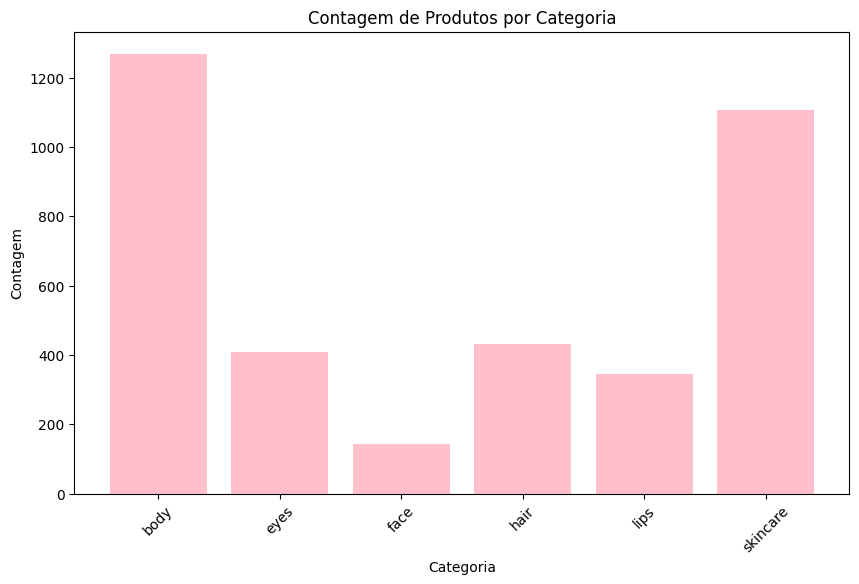

In [ ]:
# Gráfico de barras para categorias
plt.figure(figsize=(10, 6))
plt.bar(df_categoria['Categoria'], df_categoria['Contagem'], color='pink')
plt.title('Contagem de Produtos por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

Para melhorar a visualização, o gráfico acima foi dividido em subcategorias de produtos.

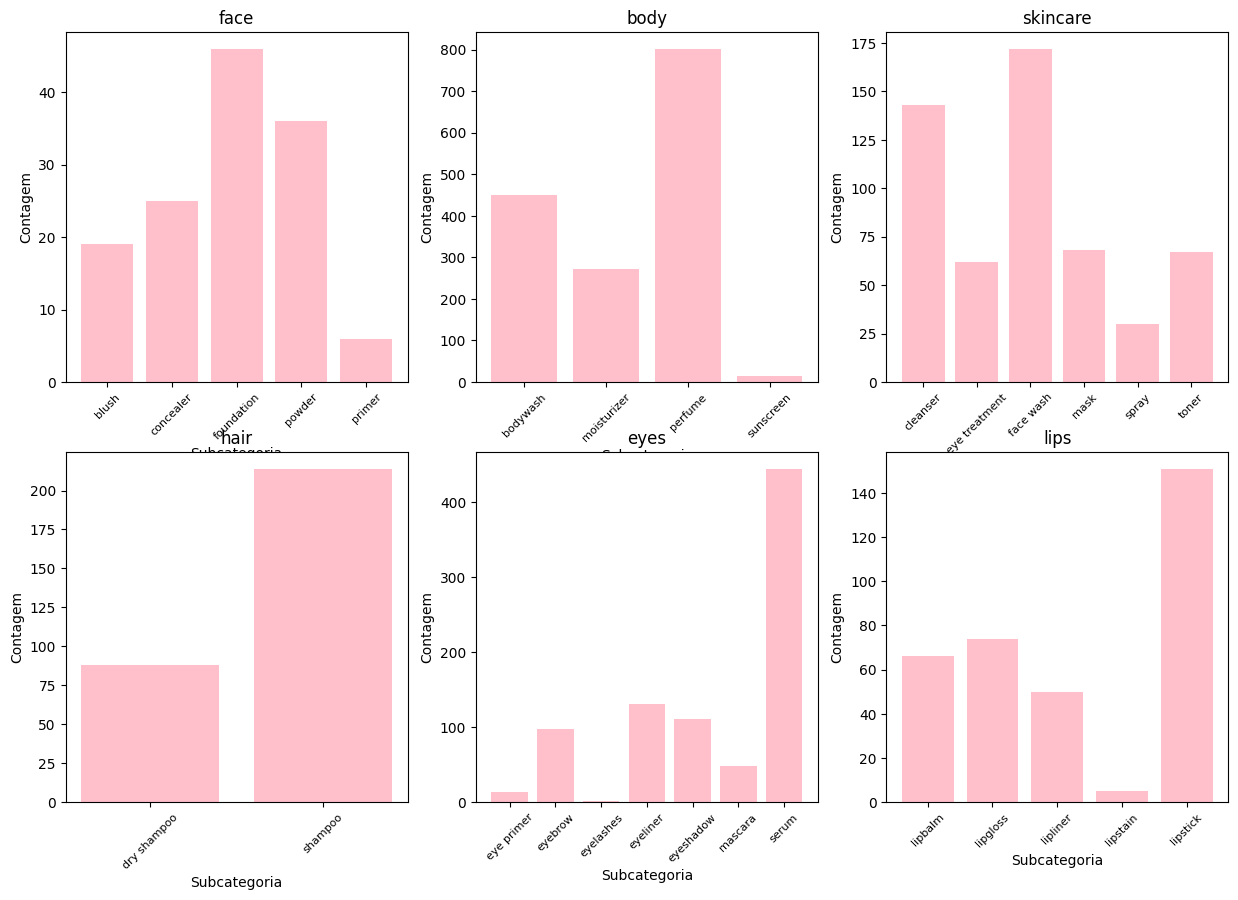

In [ ]:
#Gráfico de Barras de categorias por subcategorias

n_cols = 3
n_rows = (len(df_subcategoria['Categoria'].unique()) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Criar gráficos
for i, category in enumerate(df_subcategoria['Categoria'].unique()):
    subcat_counts = df_subcategoria[df_subcategoria['Categoria'] == category]
    axes[i].bar(subcat_counts['Subcategoria'], subcat_counts['Contagem'], color='#FFC0CB')
    axes[i].set_title(category)
    axes[i].set_xlabel('Subcategoria')
    axes[i].set_ylabel('Contagem')
    axes[i].tick_params(axis='x', rotation=45, labelsize=8)

Dos produtos mais vendidos, o perfume é o líder de vendas, seguido do *bodywash* e Serum para olhos.

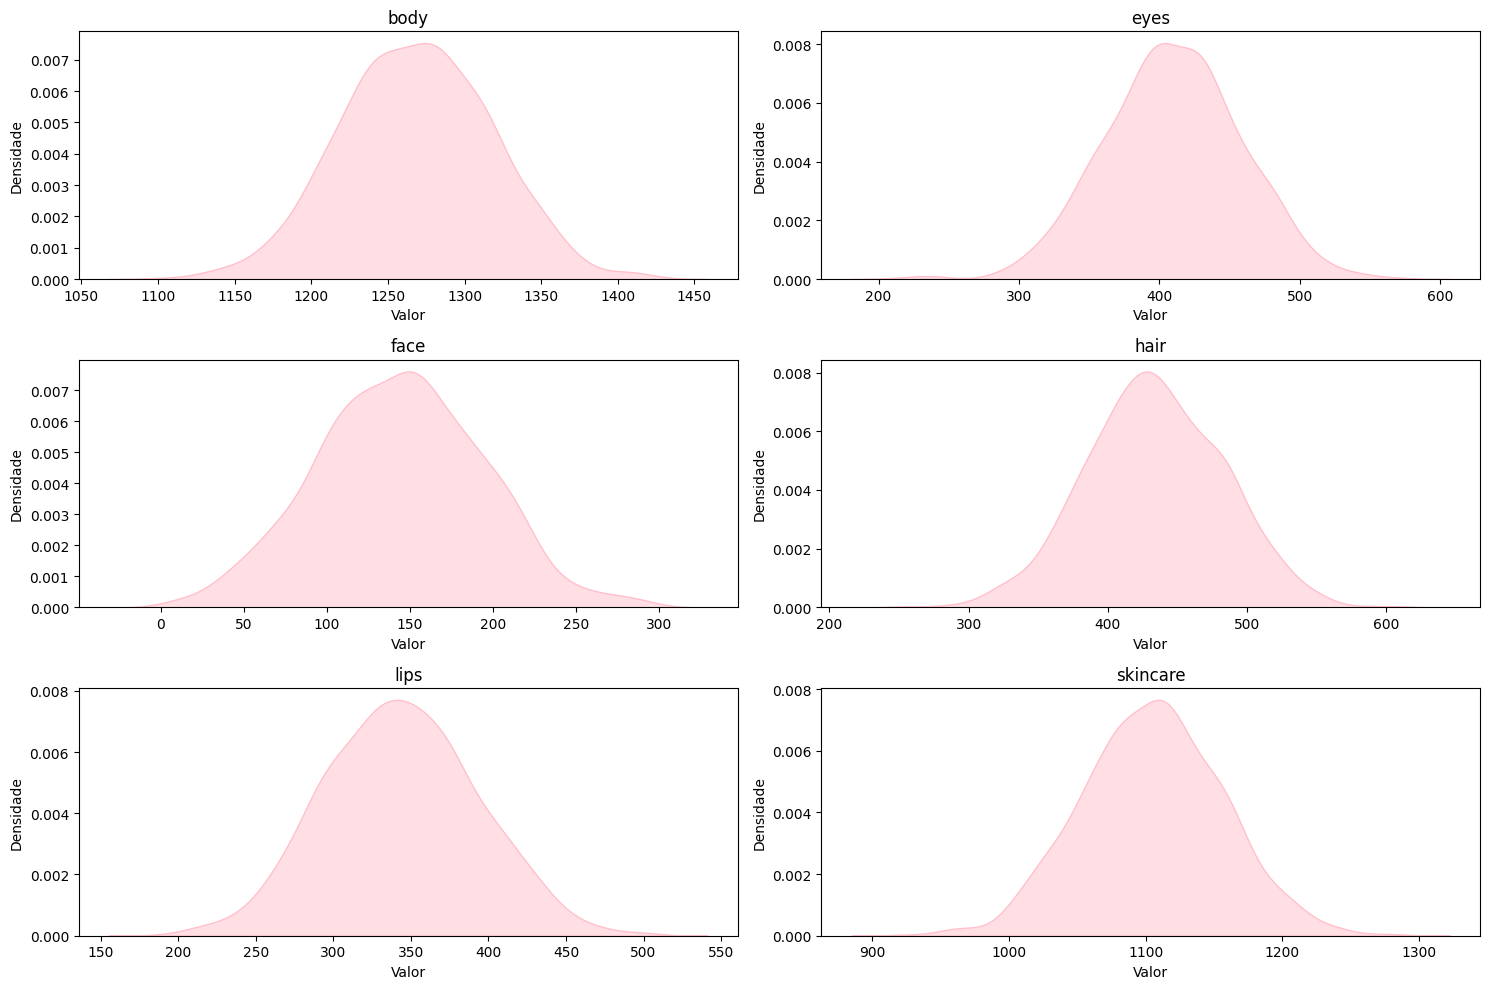

In [ ]:
# Density Plot
plt.figure(figsize=(15, 10))

for i, row in df_categoria.iterrows():
    data = np.random.normal(loc=row['Contagem'], scale=50, size=1000)
    plt.subplot(3, 2, i + 1)
    sns.kdeplot(data, fill=True, color='pink', alpha=0.5)
    plt.title(row['Categoria'])
    plt.xlabel('Valor')
    plt.ylabel('Densidade')

plt.tight_layout()
plt.show()

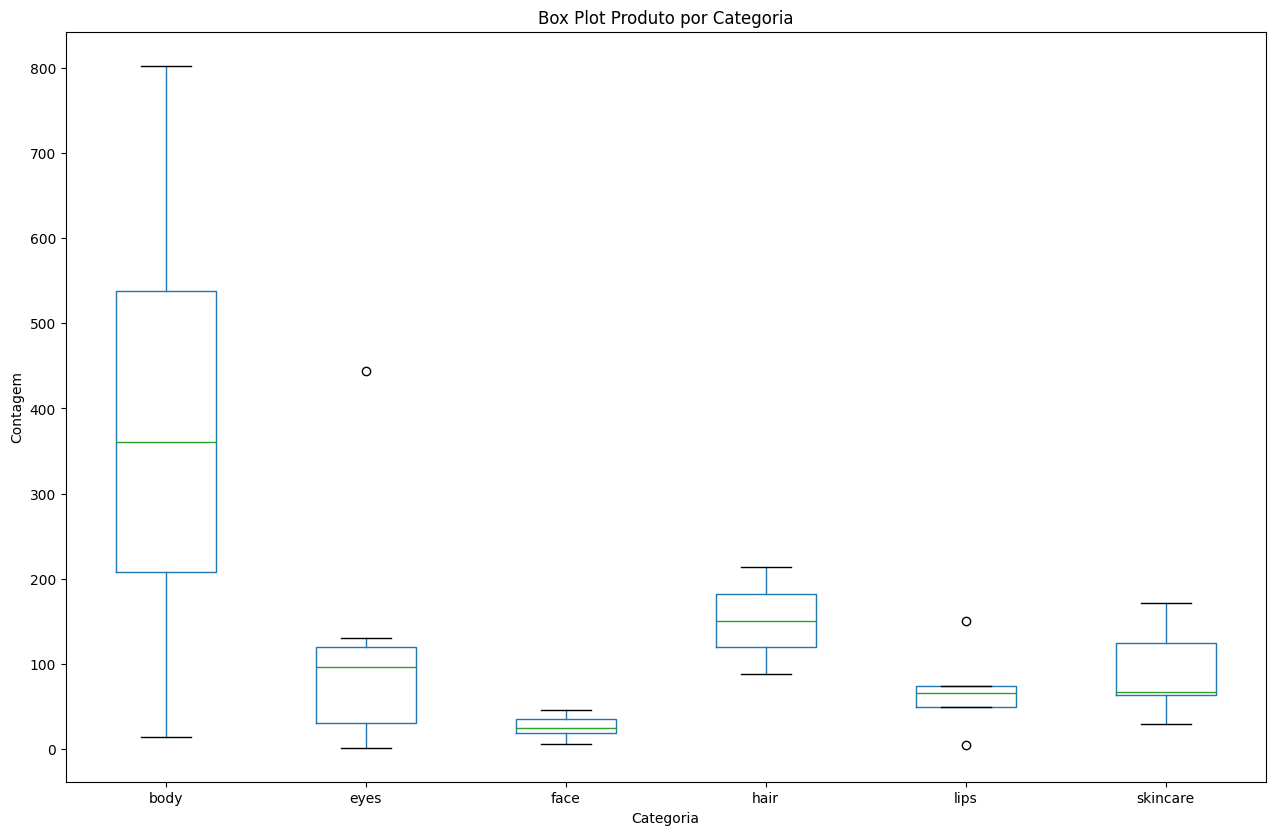

In [ ]:
# Boxplot
ax = df_subcategoria.boxplot(column='Contagem', by='Categoria', grid=False, figsize=(15, 10))

# Configurar título e eixos
plt.title('Box Plot Produto por Categoria')
plt.suptitle('')
plt.xlabel('Categoria')
plt.ylabel('Contagem')

plt.show()

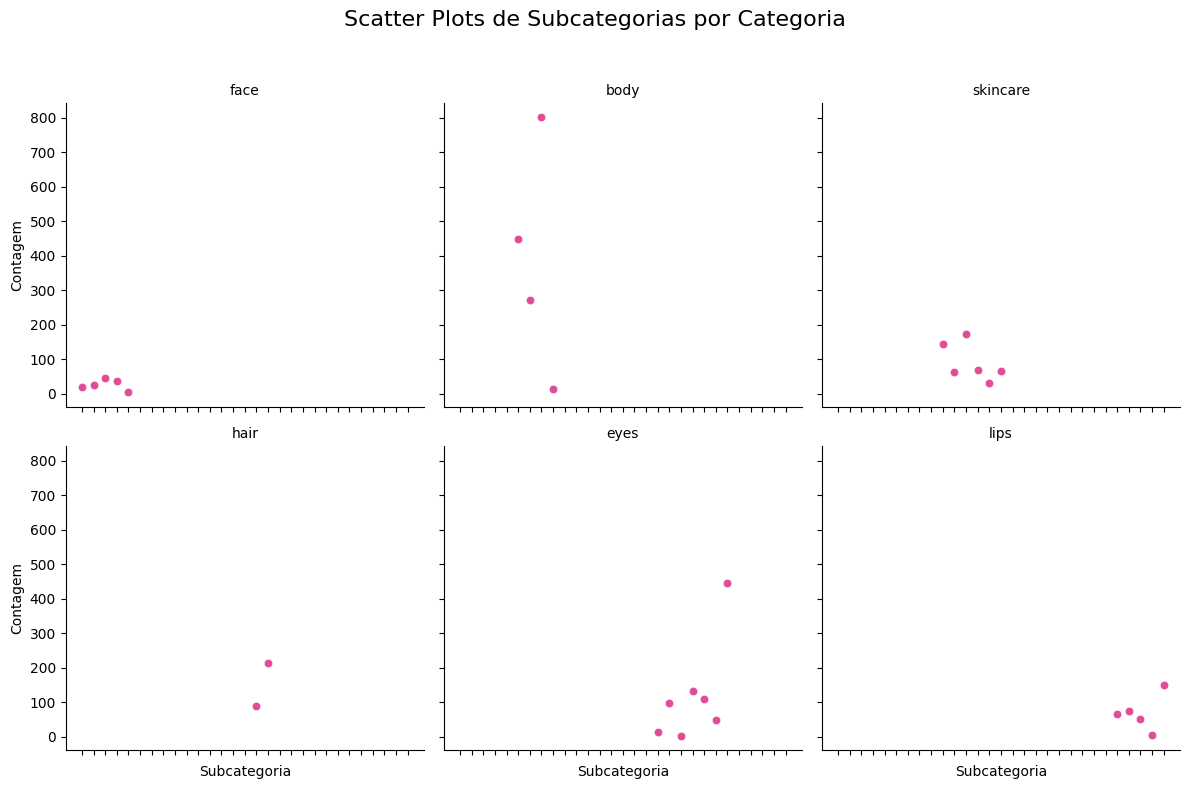

In [ ]:
# Scatter plot

g = sns.FacetGrid(df_subcategoria, col='Categoria', col_wrap=3, height=4)
g.map(sns.scatterplot, 'Subcategoria', 'Contagem', color='#D5006D', alpha=0.7)

# Configurações do gráfico
g.set_titles(col_template="{col_name}")
g.set_xticklabels(rotation=45)
g.set_axis_labels("Subcategoria", "Contagem")
g.fig.suptitle('Scatter Plots de Subcategorias por Categoria', fontsize=16)
g.fig.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


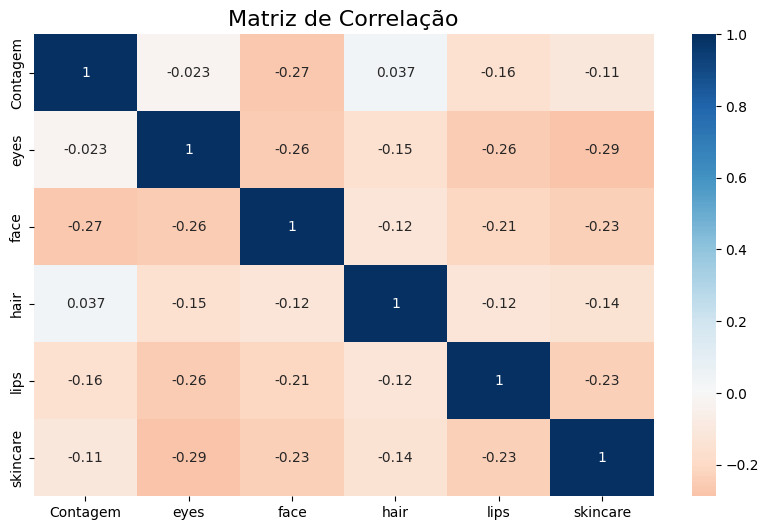

In [ ]:
# Matriz de Correlação
df_dummies = pd.get_dummies(df_subcategoria['Categoria'], drop_first=True)
correlation_matrix = pd.concat([df_subcategoria['Contagem'], df_dummies], axis=1).corr()

# Plotar
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', center=0)
plt.title('Matriz de Correlação', fontsize=16)
plt.show()

Os resultados evidenciam que os consumidores demonstram uma preferência pela compra de produtos de cuidado pessoal, como perfumes, *body Wash, face Wash, shampoo*, em comparação a maquiagem. nessa análise podemos ver qual a real preferência. A partir dessa análise, podemos compreender com mais clareza as reais preferências dos consumidores no que diz respeito às categorias de cosméticos, oferecendo insights valiosos para estratégias de mercado e desenvolvimento de novos produtos.

In [ ]:
# verificando nulls no dataset
dataset.isnull().sum()

,0
Produto,0
Website,0
País,0
Categoria,0
Subcategoria,0
Preço,1
Marca,0
Fórmula,6
Tipo,6
Cor,156


<Axes: >

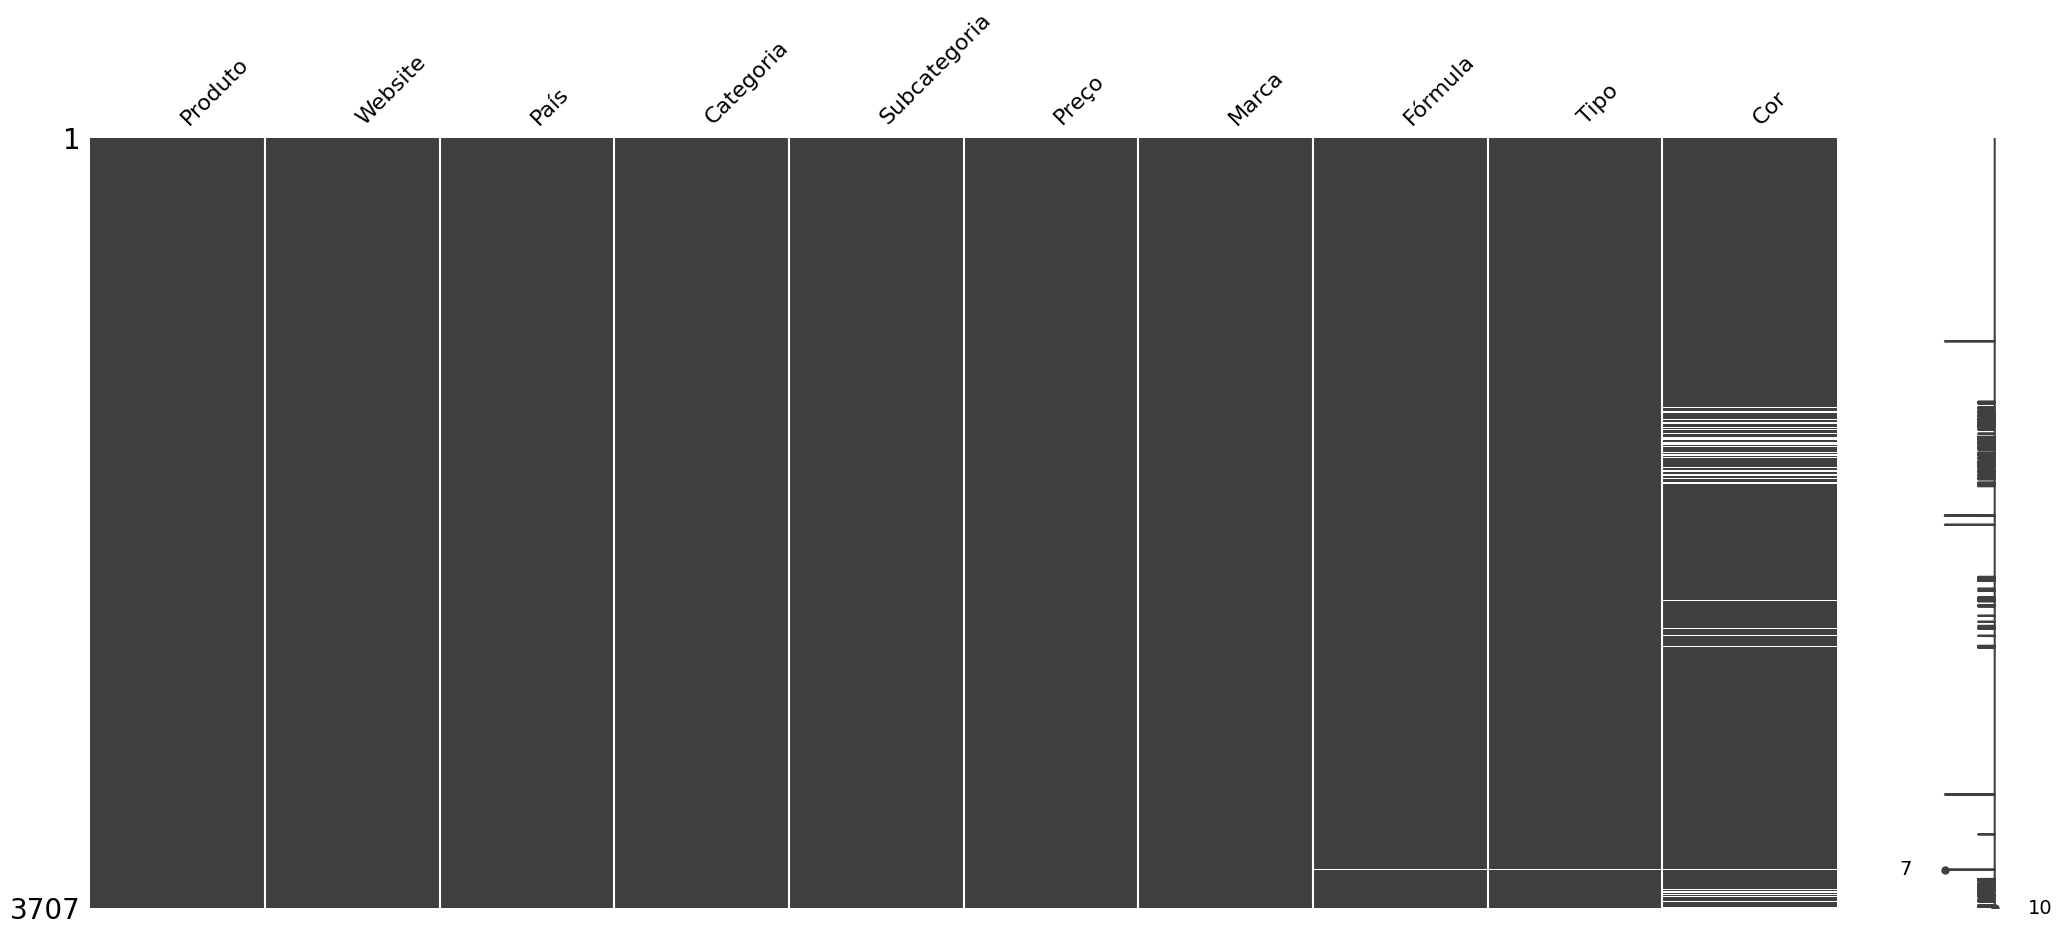

In [ ]:
# recuperando os nomes das colunas
col = list(dataset.columns)

# o novo dataset irá conter todas as colunas com exceção da última (classe)
atributos = dataset[col[0:-1]]

# substituindo os zeros por NaN
atributos.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

<Axes: >

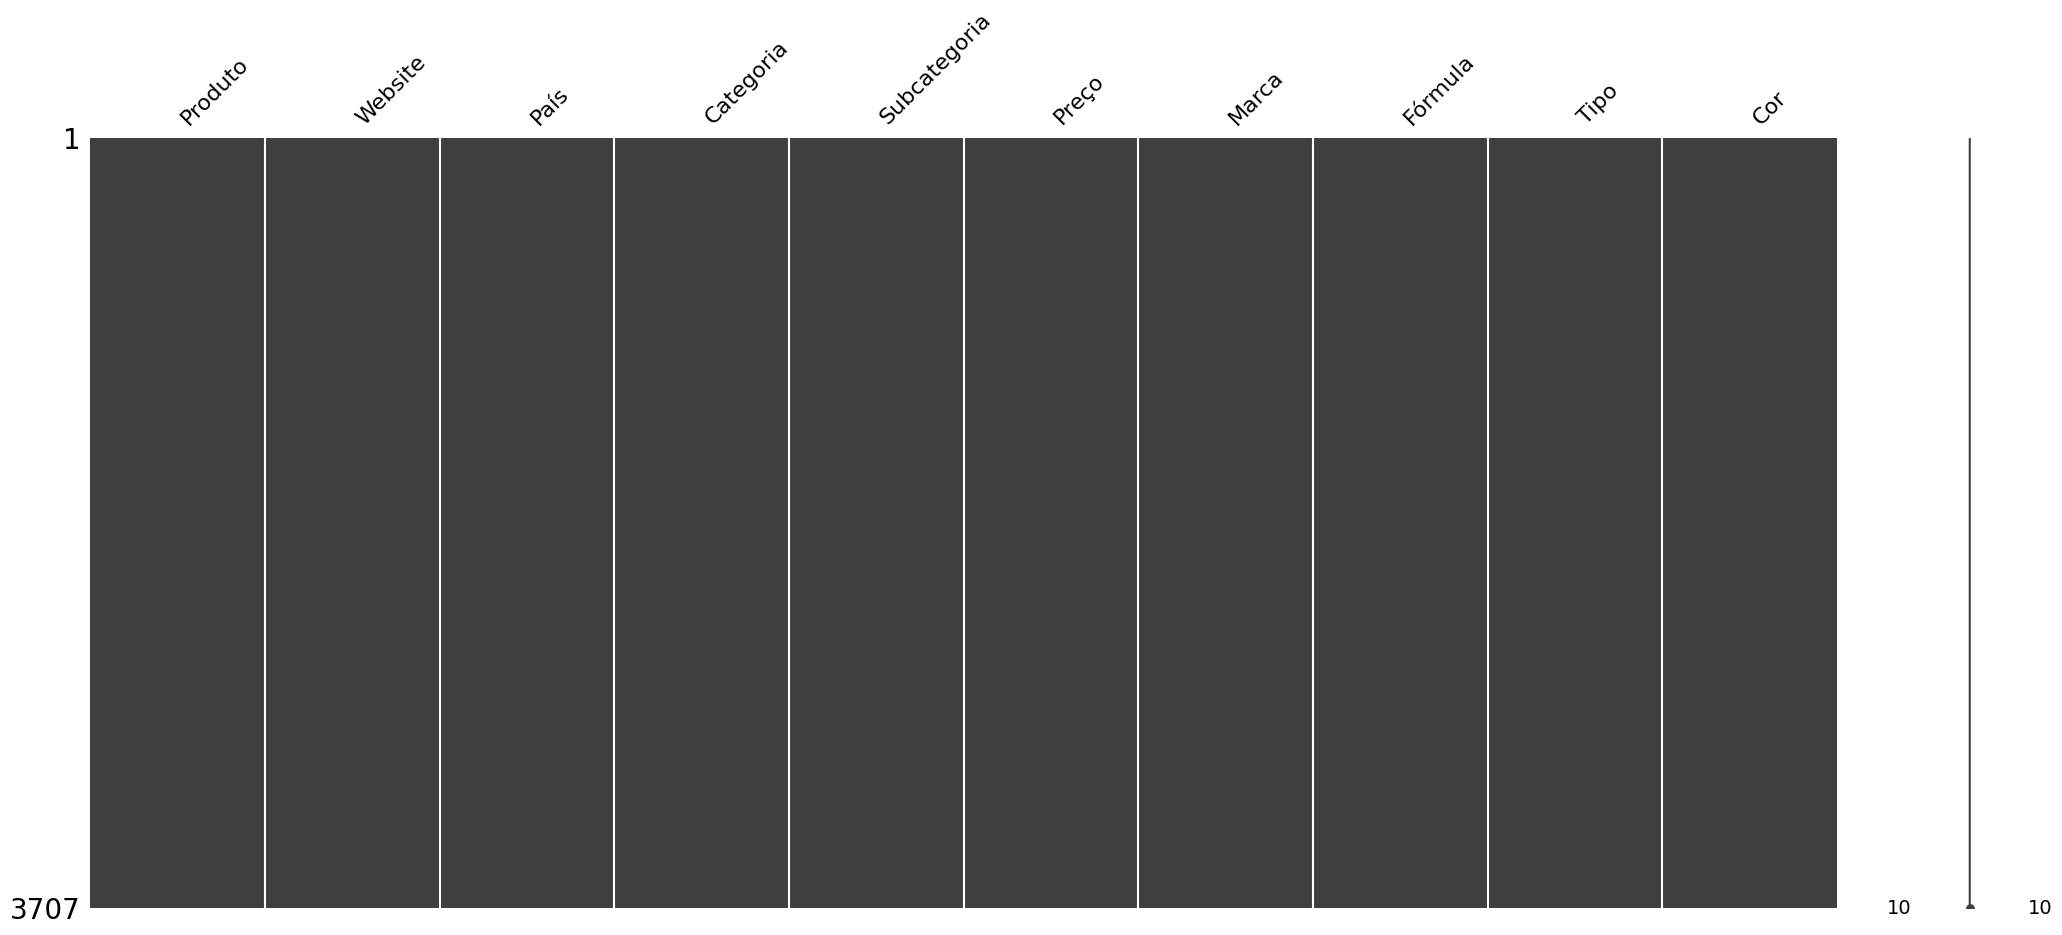

In [ ]:
# substituindo os NaN de 'Fórmula', 'Tipo'e 'Cor' pela mediana da coluna
atributos['Fórmula'].fillna(atributos['Fórmula'].mode()[0], inplace=True)
atributos['Tipo'].fillna(atributos['Tipo'].mode()[0], inplace=True)
atributos['Cor'].fillna(atributos['Cor'].mode()[0], inplace=True)
atributos['Preço'].fillna(atributos['Cor'].mode()[0], inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

In [ ]:
# Novo DataSet

datasetSemMissings = atributos

# exibindo as primeiras linhas
datasetSemMissings.head()

,Produto,Website,País,Categoria,Subcategoria,Preço,Marca,Fórmula,Tipo,Cor
0,Deadsea Mud Purifying Mud Soap,ulta,USA,body,bodywash,98.04,Ahava,cream,all,No color
1,Natural Dead Sea Bath Salts,ulta,USA,body,bodywash,98.04,Ahava,cream,all,No color
2,Superfood Shower Gel Kale & Turmeric,ulta,USA,body,bodywash,196.08,Ahava,cream,all,No color
3,Sea-Kissed Mineral Shower Gel,ulta,USA,body,bodywash,196.08,Ahava,cream,all,No color
4,Mineral Botanic Velvet Cream Wash,ulta,USA,body,bodywash,196.08,Ahava,cream,all,No color


In [ ]:
# Separação em conjuntos de treino e teste (dataset original)
test_size = 0.20
seed = 7

X = dataset[['Preço', 'Marca', 'Fórmula', 'Tipo', 'Tamanho']]
y = dataset['Categoria']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed, stratify=y)

# Resultado: Conjuntos de dados prontos
print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)


Tamanho do conjunto de treino: (2965, 5)
Tamanho do conjunto de teste: (742, 5)


In [ ]:
# Separação em conjuntos de treino e teste (dataset sem missings)
test_size = 0.20
seed = 7

X = datasetSemMissings[['Preço', 'Marca', 'Fórmula', 'Tipo']]
y = datasetSemMissings['Categoria']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed, stratify=y)

# Resultado: Conjuntos de dados prontos
print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)

Tamanho do conjunto de treino: (2965, 4)
Tamanho do conjunto de teste: (742, 4)
